<a href="https://colab.research.google.com/github/SanjaySrivastav56/codealpha_tasks-/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [5]:
url = "http://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [6]:
books = soup.find_all('article', class_='product_pod')

titles = []
prices = []
ratings = []

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text[1:]  # Remove £ symbol
    rating_class = book.p['class'][1]  # e.g., 'Three', 'Five'

    titles.append(title)
    prices.append(float(price))
    ratings.append(rating_class)


In [7]:
books = soup.find_all('article', class_='product_pod')

titles = []
prices = []
ratings = []

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text[1:]  # Remove £ symbol
    rating_class = book.p['class'][1]  # e.g., 'Three', 'Five'

    titles.append(title)
    prices.append(float(price))
    ratings.append(rating_class)


In [8]:
df = pd.DataFrame({
    'Title': titles,
    'Price (£)': prices,
    'Rating': ratings
})

df.head()


,Title,Price (£),Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


In [9]:
df.to_csv('books_data.csv', index=False)


/tmp/ipython-input-10-860174518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


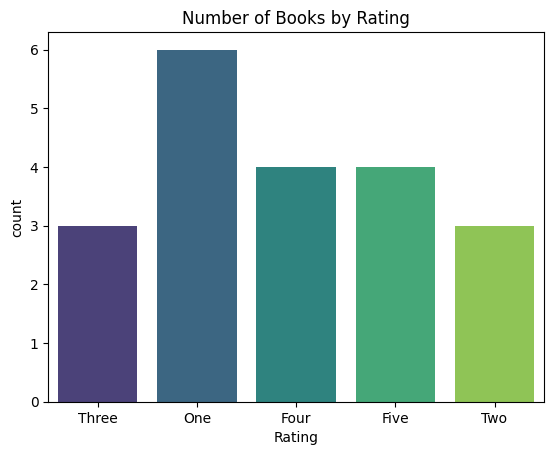

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Number of Books by Rating')
plt.show()


In [12]:
all_books = []

for page in range(1, 6):  # Scrapes first 5 pages
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text[1:]
        rating = book.p['class'][1]

        all_books.append([title, price, rating])

# Convert to DataFrame
df = pd.DataFrame(all_books, columns=['Title', 'Price (£)', 'Rating'])
df.to_csv('books_data_all_pages.csv', index=False)




/tmp/ipython-input-13-1768871931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='Set2')


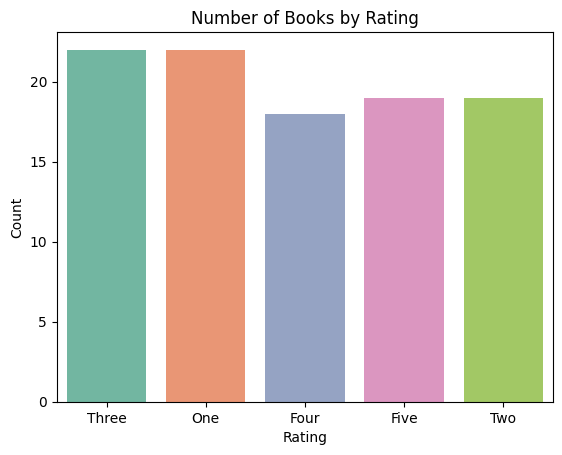

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating', data=df, palette='Set2')
plt.title('Number of Books by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


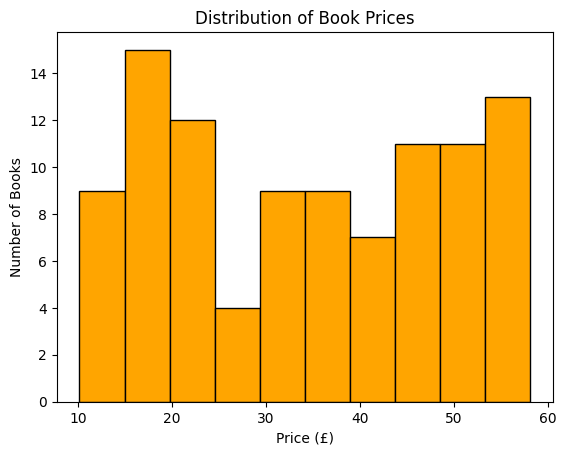

In [14]:
df['Price (£)'] = df['Price (£)'].astype(float)

plt.hist(df['Price (£)'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()
